<a href="https://colab.research.google.com/github/ayushpradhananga/Deep-Learning-Projects/blob/main/Real_estate_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



## Real estate analytics with tabular data

## Table of Content

1. [Executive Summary](#cell_Summary)

2. [Data Preprocessing](#cell_Preprocessing)

3. [Predictive Modeling](#cell_model)

4. [Experiments Report](#cell_report)



<a id = "cell_Summary"></a>
## 1. Executive Summary

*Use this section to introduce the business problem, data set, method, experiments, and obtained results*

**Problem Definition:**

The objective of this project is to analyze a dataset of house sales in King County, USA, containing over 21,613 records, and develop AI solutions to address the business needs of a real estate company.

**My primary tasks are:**

1. Evaluate the performance of regression models (linear regression and neural networks) to predict house prices.
2. Convert house prices into a nominal attribute, "High_Price" for prices 450,000 or more, and "Low_Price" for prices less than 450,000. Evaluate the performance of classification models (neural networks and another model) for this classification task.

**Business Benefit:**

The successful completion of this project will provide valuable insights and predictive capabilities to the real estate company. By accurately estimating house prices and categorizing them into high and low price segments, I can assist the company in making informed decisions regarding property valuation and investment.

**Proposed Approaches:**

For the regression task, I employed two models:

**Linear Regression:** A traditional model widely used for predicting numeric values based on input features.

**Neural Networks:** Utilizing deep learning techniques, specifically Multilayer Perceptron (MLP), to capture complex relationships within the data.

For the classification task, I used:

**Neural Networks:** Deep learning model known for its ability to handle complex patterns and relationships.

**Gradient Boosting:** Classification model chosen to compare performance with neural networks.

In addition I did some experient with other classification model.

**Major Findings:**

**Regression Model Performance Evaluation:**

**Linear Regression:** The linear regression model provided reasonable predictive performance with a correlation score of 0.831 between true and predicted values.

**Neural Networks:** The neural network model outperformed linear regression significantly in terms of estimation with correlation score of 0.89 between true and predicted values. It's performance was also significantly better for bith training and testing dataset. It demonstrated the ability to capture nonlinear relationships in the data, leading to superior estimation performance. The neural network model is recommended for accurate house price estimation.

**Classification Model Performance Evaluation:**

**Neural Networks:** The neural network model exhibited strong classification performance, accurately categorizing houses into high and low price segments. It had higher accuracy for classifying high price houses than gradient boosting. Also, the kappa and accuracy was slightly better.

**Gradient Boosting:**  The Gradient Boosting classification model also showed strong performance identical to neural network in terms of metrics. It had better classification for Low price houses than neural network.

In conclusion, neural networks proved to be highly beneficial in addressing the real estate company's business needs. The neural network models excelled in both house price estimation and price classification tasks, offering the company valuable tools for decision-making and market analysis

<a id = "cell_Preprocessing"></a>
## 2. Data Preprocessing

*Carry out necessary data preprocessing and exploration.*

###Import Libraries and data

In [ ]:
from __future__ import print_function
import os
import math
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
#Import file
house_price_data = pd.read_csv("Part1_house_price.csv")
#View head of the data
house_price_data.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


###Data Exploration

In [ ]:
#Viewing data types
house_price_data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [ ]:
# Identification of missing values
missing_data = house_price_data.isnull().sum()
missing_data = missing_data[missing_data > 0]
missing_data.sort_values(ascending=False)

Series([], dtype: int64)

There are no missing values in the dataset.

<ipython-input-5-fa9b2cc5e12c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = house_price_data.corr(method='pearson')


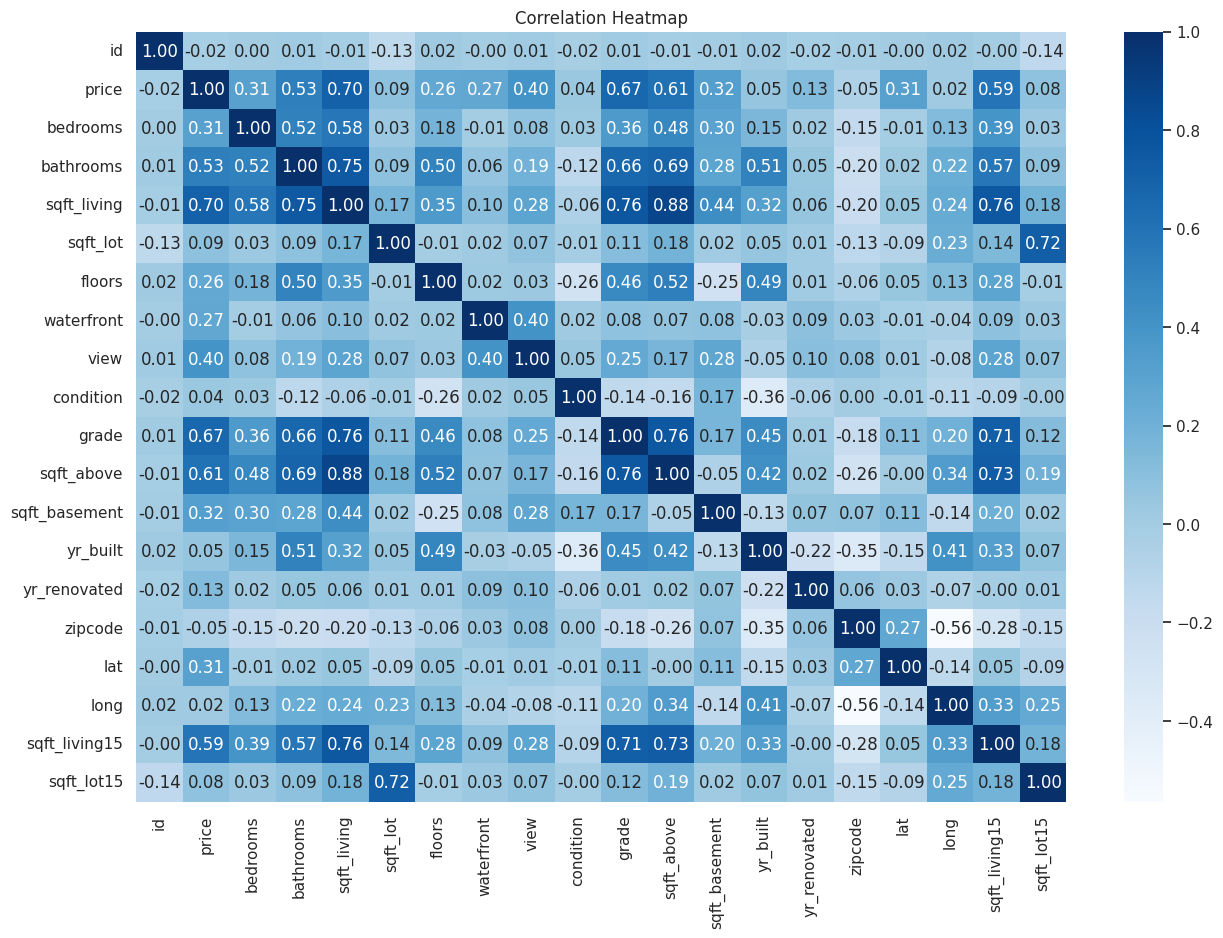

In [ ]:
# Compute correlation matrix
corr = house_price_data.corr(method='pearson')

# Plot correlation heatmap
sns.set(rc={'figure.figsize': (15, 10)})
ax = sns.heatmap(corr, annot=True, fmt=".2f", cmap="Blues")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
#Rank correlation coefficient with price
price_corr = house_price_data.corr()['price'].sort_values(ascending=False)
print(price_corr)

price            1.000000
sqft_living      0.702044
grade            0.667463
sqft_above       0.605566
sqft_living15    0.585374
bathrooms        0.525134
view             0.397346
sqft_basement    0.323837
bedrooms         0.308338
lat              0.306919
waterfront       0.266331
floors           0.256786
yr_renovated     0.126442
sqft_lot         0.089655
sqft_lot15       0.082456
yr_built         0.053982
condition        0.036392
long             0.021571
id              -0.016797
zipcode         -0.053168
Name: price, dtype: float64


<ipython-input-6-0dd502f7f78f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  price_corr = house_price_data.corr()['price'].sort_values(ascending=False)


In [ ]:
# Convert Date attribute to Datetype
house_price_data['date'] = pd.to_datetime(house_price_data['date'])

# Create new columns month and year based on date
house_price_data['month'] = house_price_data['date'].apply(lambda date:date.month)
house_price_data['year'] = house_price_data['date'].apply(lambda date:date.year)

# Check the new columns
print(house_price_data.columns.values)

['id' 'date' 'price' 'bedrooms' 'bathrooms' 'sqft_living' 'sqft_lot'
 'floors' 'waterfront' 'view' 'condition' 'grade' 'sqft_above'
 'sqft_basement' 'yr_built' 'yr_renovated' 'zipcode' 'lat' 'long'
 'sqft_living15' 'sqft_lot15' 'month' 'year']


In [ ]:
# Drop columns we don't need
house_price_data = house_price_data.drop(columns=['id','zipcode','date'])

###Feature Selection

In [ ]:
# Split the data into X & y
X = house_price_data.drop(['price'], axis = 1)
y = house_price_data['price']

print(X.shape)
print(y.shape)

(21613, 19)
(21613,)


###Data Scaling and Creating Training and Test Sets

In [ ]:
# Import scaler
from sklearn.preprocessing import MinMaxScaler

# Scaling the features using MinMaxScaler
scaler = MinMaxScaler()
X_scale = scaler.fit_transform(X)

# Split the data into training and test sets
from sklearn.model_selection import train_test_split # Import train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.3, stratify=None, random_state=2023)


In [ ]:
print('Missing training values before imputation = ', np.isnan(X_train).sum())
print('Missing validation values before imputation = ', np.isnan(X_test).sum())
print('X train min =', round(X_train.min().min(),4), '; max =', round(X_train.max().max(), 4))
print('X valid min =', round(X_test.min().min(),4), '; max =', round(X_test.max().max(), 4))

Missing training values before imputation =  0
Missing validation values before imputation =  0
X train min = 0.0 ; max = 1.0
X valid min = 0.0 ; max = 1.0


In [ ]:
# Print the shapes of the training and testing sets
training_shape = X_train.shape
validation_shape = X_test.shape
training_samples = training_shape[0]
validation_samples = validation_shape[0]

print("Training shape: ({}, {})".format(training_shape[0], training_shape[1]))
print("Training samples: ", training_samples)
print("Validation samples: ", validation_samples)

Training shape: (15129, 19)
Training samples:  15129
Validation samples:  6484


<a id = "cell_model"></a>
## 3. Predictive Modeling

*Create and explain your models (e.g., model architecture, model parameters). Evaluate the models on the experimental data sets.*

In [ ]:
import tensorflow as tf
from tensorflow.keras import metrics
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Nadam, RMSprop

# evaluation on test data
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
from sklearn.metrics import classification_report,confusion_matrix

###**Price Estimation**

Here, we compare the performance of two models: linear regression and neural network for house price prediction.

####**Linear Regression Model Creation and Training**

In [ ]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
linear_reg_model = LinearRegression()

# Fit the model to your training data
linear_reg_model.fit(X_train, y_train)

LinearRegression()

####Model Evaluation and Prediction

In [ ]:
# Make predictions on the training data
linear_reg_train_predictions = linear_reg_model.predict(X_train)

# Calculate and print metrics for the training set
train_mae = mean_absolute_error(y_train, linear_reg_train_predictions)
train_mse = mean_squared_error(y_train, linear_reg_train_predictions)
train_rmse = np.sqrt(train_mse)

print('Linear Regresssion Training MAE: ', train_mae)
print('Linear Regresssion Training MSE: ', train_mse)
print('Linear Regresssion Training RMSE: ', train_rmse)

# Make predictions on the test data
linear_reg_test_predictions = linear_reg_model.predict(X_test)

# Calculate and print metrics for the test set
test_mae = mean_absolute_error(y_test, linear_reg_test_predictions)
test_mse = mean_squared_error(y_test, linear_reg_test_predictions)
test_rmse = np.sqrt(test_mse)

print('Linear Regresssion Test MAE: ', test_mae)
print('Linear RegresssionTest MSE: ', test_mse)
print('Linear Regresssion Test RMSE: ', test_rmse)

Linear Regresssion Training MAE:  127491.78826789187
Linear Regresssion Training MSE:  42133897373.944954
Linear Regresssion Training RMSE:  205265.43151233468
Linear Regresssion Test MAE:  125526.68849489385
Linear RegresssionTest MSE:  38171940875.01098
Linear Regresssion Test RMSE:  195376.4081843327


####Plotting True vs Predicted values

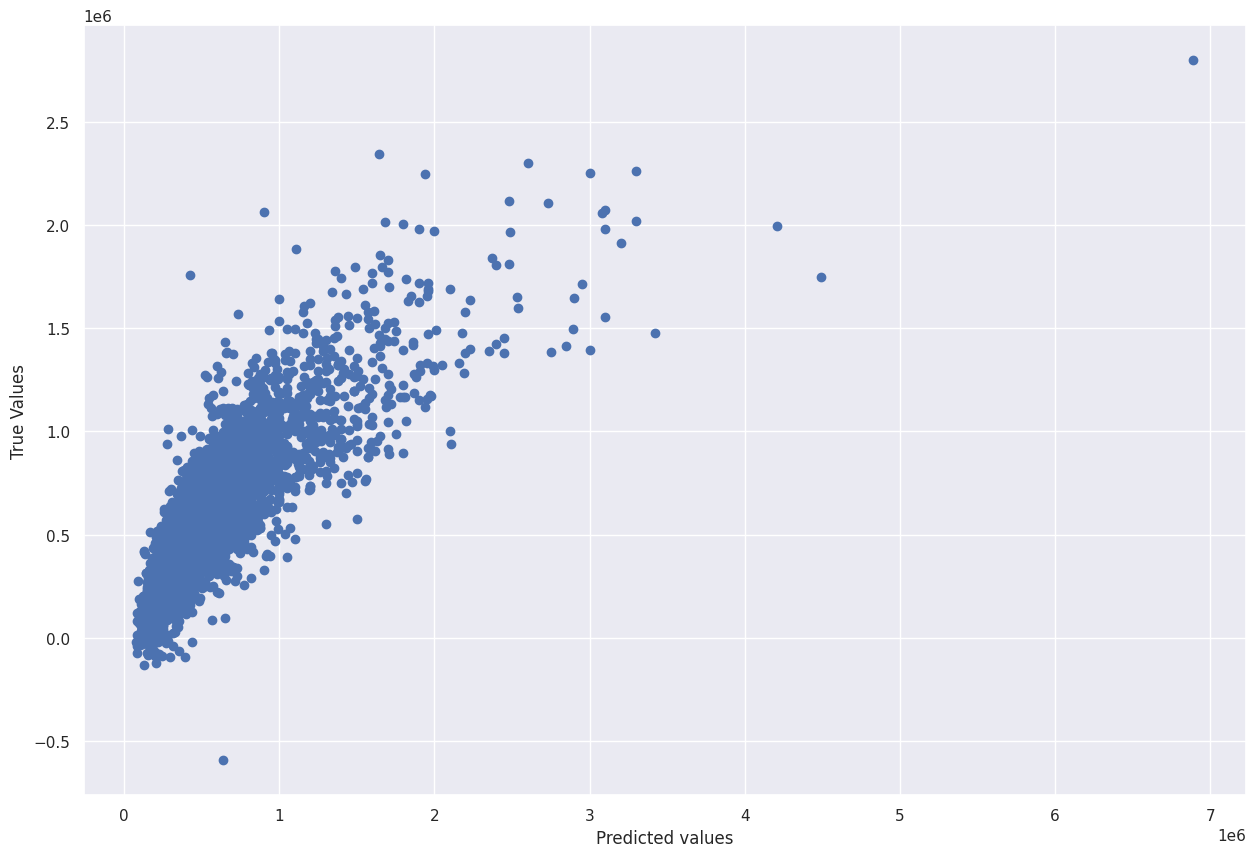

The Correlation between y_test and y_predict is: 0.831


In [ ]:
plt.scatter(y_test, linear_reg_test_predictions)
plt.ylabel('True Values')
plt.xlabel('Predicted values')
plt.show()
# Calculate the correlation coefficient
corr = np.corrcoef(y_test, linear_reg_test_predictions)

# Extract the correlation coefficient from the result
cor_coefficient = corr[0, 1]

# Print the correlation coefficient
print('The Correlation between y_test and y_predict is:', round(cor_coefficient, 3))

####**Neural Network**

An activation function is essential in a neural network because it introduces non-linearity, allowing the network to handle complex patterns and relationships. Without an activation function, the network behaves like a linear regression model, which is limited in its capabilities.

Neural networks are assumed to perform better than linear models because they can capture intricate, non-linear data patterns. The 'relu' activation function, for example, enables neural networks to model a wide range of non-linear functions, making them powerful tools for tasks like regression.

In [ ]:
# Define your neural network model
ann = Sequential([
    Dense(100, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(50, activation='relu'),
    Dropout(0.2),  # Dropout layer with a dropout rate of 20%
    Dense(16, activation='relu'),  # Additional hidden layer
    Dense(1)  # Output layer for regression
])

# Compile the model
ann.compile(loss='mean_squared_error',
        optimizer=RMSprop(learning_rate=0.005, rho=0.9, momentum=0.0, epsilon=1e-07, weight_decay=0.0,),
        metrics=[metrics.mae])

In the neural network architecture for regression, I've used the following components:

**Activation Function:** ReLU is employed in the hidden layers to introduce non-linearity into the model.

**Dropout:** I applied a dropout rate of 20% to the second hidden layer. During training, approximately 20% of the neurons in this layer are randomly deactivated for each batch. This helps prevent overfitting by adding noise and reducing reliance on specific neurons.

**Optimizer:** I chose RMSprop as the optimization algorithm. It's a variant of gradient descent that adapts the learning rate for each parameter during training. My configuration includes a learning rate of 0.005, no momentum effect, epsilon set to 1e-07, and no weight decay.

**Loss Function:** For this regression task, I opted for Mean Squared Error (MSE), which measures the average squared difference between the predicted values and the actual target values.
Metric: In addition to MSE, I use Mean Absolute Error (MAE) as a metric to evaluate the model's performance.

**Regarding hyperparameters:**

**Learning Rate:** I set the learning rate to 0.005, striking a balance between training speed and convergence. The learning rate determines the step size during weight updates in optimization.

**Momentum:** In this model, I chose a momentum value of 0.0, meaning there's no momentum effect. Each weight update is solely determined by the current gradient. Momentum can accelerate convergence by smoothing weight updates but wasn't used here.

**Epsilon:** Epsilon (ε) was set to 1e-07 to ensure numerical stability during optimization. It's particularly important when dealing with small gradient values.

**Weight Decay:** I didn't apply weight decay (L2 regularization) in this model. Weight decay adds a penalty term based on weight magnitudes to prevent overfitting. However, in this case, I relied on other regularization techniques.

In [ ]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               2000      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                816       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 7,883
Trainable params: 7,883
Non-trainable params: 0
_________________________________________________________________


**Model Architechture**

**Hidden Layer 1 (Dense - "dense"):**
Output Shape: (None, 100)
Trainable Parameters: 19 (input features) * 100 (neurons) + 100 (biases) = 2000

**Hidden Layer 2 (Dense - "dense_1"):**
Output Shape: (None, 50)
Trainable Parameters: 100 (previous layer output) * 50 (neurons) + 50 (biases) = 2080

**Dropout Layer ("dropout"):**
Output Shape: (None, 50)
No trainable parameters (0).

**Hidden Layer 3 (Dense - "dense_2"):**
Output Shape: (None, 16)
Trainable Parameters: 50 (previous layer output) * 16 (neurons) + 16 (biases) = 528

**Output Layer (Dense - "dense_3"):**
Output Shape: (None, 1)
Trainable Parameters: 16 (previous layer output) * 1 (neuron) + 1 (bias) = 17
Total Trainable Parameters: 1280 + 2080 + 528 + 17 = 3905.

####**Model Training**

EarlyStopping callback is used from Keras to stop the model training if the validation loss stops decreasing for a few epochs (Here, after 10 epochs).

In [ ]:
# Import the EarlyStopping callback from Keras
from tensorflow.keras.callbacks import EarlyStopping

# Create an EarlyStopping callback with 'val_loss' as the monitor and patience set to 10
escb = EarlyStopping(monitor='val_loss', patience=10)

# Train the neural network model 'ann'
history = ann.fit(
    X_train,               # Training data features
    y_train,               # Training data labels
    batch_size=64,         # Batch size for training
    epochs=100,            # Number of training epochs
    shuffle=True,          # Shuffle the training data before each epoch
    verbose=2,             # Verbosity level for training output
    validation_data=(X_test, y_test),  # Validation data
    callbacks=[escb]       # List of callbacks, including EarlyStopping
)


Epoch 1/100
237/237 - 5s - loss: 335465021440.0000 - mean_absolute_error: 436512.0938 - val_loss: 107129667584.0000 - val_mean_absolute_error: 189826.6875 - 5s/epoch - 19ms/step
Epoch 2/100
237/237 - 1s - loss: 105324380160.0000 - mean_absolute_error: 201394.9062 - val_loss: 80309600256.0000 - val_mean_absolute_error: 184573.5156 - 1s/epoch - 5ms/step
Epoch 3/100
237/237 - 1s - loss: 88341348352.0000 - mean_absolute_error: 185572.9531 - val_loss: 66043400192.0000 - val_mean_absolute_error: 166755.0625 - 1s/epoch - 5ms/step
Epoch 4/100
237/237 - 1s - loss: 72144781312.0000 - mean_absolute_error: 163325.3594 - val_loss: 52695695360.0000 - val_mean_absolute_error: 142172.3594 - 1s/epoch - 5ms/step
Epoch 5/100
237/237 - 1s - loss: 61321003008.0000 - mean_absolute_error: 147302.8906 - val_loss: 47234646016.0000 - val_mean_absolute_error: 131603.9062 - 1s/epoch - 5ms/step
Epoch 6/100
237/237 - 1s - loss: 56767725568.0000 - mean_absolute_error: 143872.6250 - val_loss: 45543616512.0000 - val_m

####Model Evaluation

In [ ]:
# Evaluate model
train_score = ann.evaluate(X_train, y_train, verbose=0)
valid_score = ann.evaluate(X_test, y_test, verbose=0)

# Train metrics
mae_train = round(train_score[1], 2)
mse_train = round(train_score[0], 2)
rmse_train = round(np.sqrt(train_score[0]), 2)  # Calculate RMSE from MSE

# Validation metrics
mae_valid = round(valid_score[1], 2)
mse_valid = round(valid_score[0], 2)
rmse_valid = round(np.sqrt(valid_score[0]), 2)  # Calculate RMSE from MSE

# Print metrics
print('ANN Train MAE:', mae_train)
print('ANN Train MSE:', mse_train)
print('ANN Train RMSE:', rmse_train)
print('ANN Validation MAE:', mae_valid)
print('ANN Validation MSE:', mse_valid)
print('ANN Validation RMSE:', rmse_valid)


ANN Train MAE: 102880.39
ANN Train MSE: 28987170816.0
ANN Train RMSE: 170256.19
ANN Validation MAE: 101394.77
ANN Validation MSE: 26546800640.0
ANN Validation RMSE: 162931.89


####Model Prediction

203/203 [==============================] - 0s 1ms/step


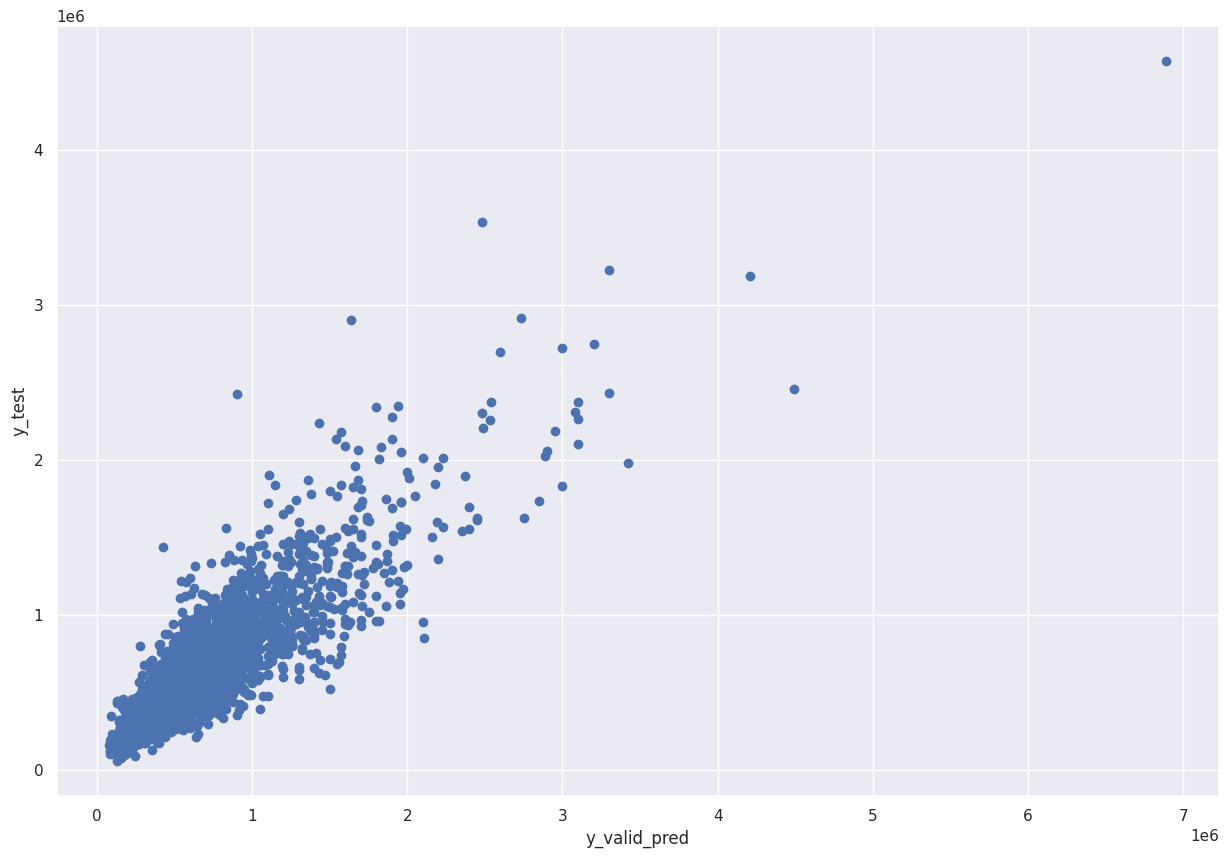

Shape of y_test: (6484,)
Shape of y_valid_pred: (6484, 1)
The Correlation between y_test and y_valid_pred is: 0.887


In [ ]:
y_valid_pred = ann.predict(X_test)
# Plot
plt.scatter(y_test, y_valid_pred)
plt.ylabel('y_test')
plt.xlabel('y_valid_pred')
plt.show()

shape_y_test = y_test.shape
shape_y_valid_pred = y_valid_pred.shape

# Print the shapes
print("Shape of y_test:", shape_y_test)
print("Shape of y_valid_pred:", shape_y_valid_pred)

# Calculate the correlation coefficient
corr_result = np.corrcoef(y_test, y_valid_pred[:, 0])

# Extract the correlation coefficient from the result
correlation_coefficient = corr_result[0, 1]

# Print the correlation coefficient
print('The Correlation between y_test and y_valid_pred is:', round(correlation_coefficient, 3))


####Plotting Training and Validation Loss

In [ ]:
def plot_hist(h, xsize=6, ysize=5):
    # Prepare plotting
    fig_size = plt.rcParams["figure.figsize"]
    plt.rcParams["figure.figsize"] = [xsize, ysize]

    # Get training and validation keys
    ks = list(h.keys())
    n2 = math.floor(len(ks)/2)
    train_keys = ks[0:n2]
    valid_keys = ks[n2:2*n2]

    # summarize history for different metrics
    for i in range(n2):
        plt.plot(h[train_keys[i]])
        plt.plot(h[valid_keys[i]])
        plt.title('Training vs Validation '+train_keys[i])
        plt.ylabel(train_keys[i])
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper left')
        plt.draw()
        plt.show()

    return

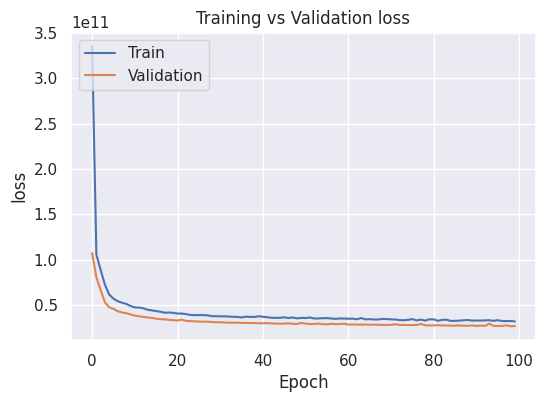

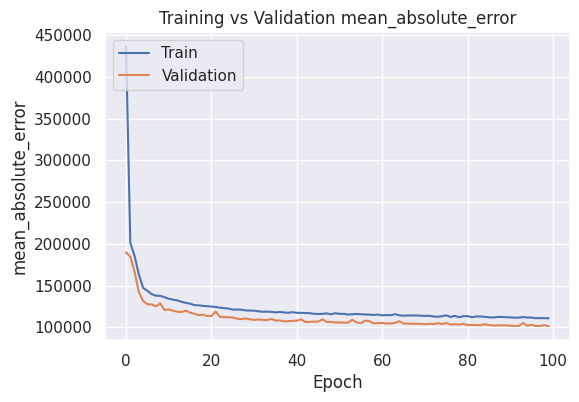

In [ ]:
# Create a DataFrame with training and validation loss values
hist = pd.DataFrame(history.history)

# Plot history
plot_hist(hist, xsize=6, ysize=4)

###Classification

In this section, we will transform the 'price' attribute from a numeric format into a nominal one. Specifically, houses with a price of 450,000 or more will be categorized as 'HighPrice' and less than 450,000 will be categorized as 'LowPrice.' This transformation allows us to explore and analyze the data in a more categorical context, which can be valuable for various analytical purposes such as classification modelling.

In [ ]:
# Define the threshold price for categorization
threshold_price = 450000

# Define a function to categorize prices
def categorize_price(price):
    return 'High_Price' if price >= threshold_price else 'Low_Price'

# Apply the categorize_price function to create a new column 'price_category'
house_price_data['price_category'] = house_price_data['price'].apply(categorize_price)

# Drop the 'price' column from the DataFrame
house_price_data.drop(columns=['price'], inplace=True)

# Display the updated DataFrame with the 'price_category' column
house_price_data.head()


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year,price_category
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014,Low_Price
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,2014,High_Price
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2,2015,Low_Price
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,12,2014,High_Price
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2,2015,High_Price


We are mapping the 'High_Price' category to 1 and the 'Low_Price' category to 0 in the 'price_category' column.

After mapping the categories to numeric values, we convert the entire 'price_category' column to the integer data type to ensure that it contains numerical values.

In [ ]:
# Convert 'High_Price' to 1 and 'Low_Price' to 0 in the 'price_category' column
house_price_data['price_category'][house_price_data['price_category'] == 'High_Price'] = 1
house_price_data['price_category'][house_price_data['price_category'] == 'Low_Price'] = 0

# Convert the 'price_category' column to integer data type
house_price_data['price_category'] = house_price_data['price_category'].astype(int)


<ipython-input-25-7686035043d8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_price_data['price_category'][house_price_data['price_category'] == 'High_Price'] = 1
<ipython-input-25-7686035043d8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_price_data['price_category'][house_price_data['price_category'] == 'Low_Price'] = 0


In [ ]:
#View binary price category
house_price_data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year,price_category
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014,0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,2014,1
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2,2015,0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,12,2014,1
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2,2015,1


####Train Test Split

The dataset is split into training and testing sets using train_test_split with a test size of 30% and a specified random state (2023) for reproducibility.

In [ ]:
label = house_price_data['price_category']

# Splitting the dataset into training and testing sets
price_X_train, price_X_test, price_y_train, price_y_test = train_test_split(X_scale, label, test_size=0.3, random_state=2023) # using a random state for reproducibility

# Print the minimum and maximum values of the training set
print('X train min =', round(price_X_train.min().min(), 4), '; max =', round(price_X_train.max().max(), 4))

# Print the minimum and maximum values of the testing set
print('X valid min =', round(price_X_test.min().min(), 4), '; max =', round(price_X_test.max().max(), 4))


X train min = 0.0 ; max = 1.0
X valid min = 0.0 ; max = 1.0


One-hot encoding is required for neural networks to represent categorical data as binary vectors. It ensures that neural networks can process categorical variables, handle multi-class problems, and make predictions without making incorrect ordinal assumptions about the data.

In [ ]:
# Convert binary labels to one-hot encoding
from keras.utils import to_categorical

# Convert training and testing labels to one-hot encoding
y_train_one_hot = to_categorical(price_y_train, num_classes=2)
y_test_one_hot = to_categorical(price_y_test, num_classes=2)

# Print the shapes of the training and testing data and labels
print('Train shape: x=', price_X_train.shape, ', y=', y_train_one_hot.shape)
print('Test shape: x=', price_X_test.shape, ', y=', y_test_one_hot.shape)


Train shape: x= (15129, 19) , y= (15129, 2)
Test shape: x= (6484, 19) , y= (6484, 2)


####Neural Network Model Building

I've designed a neural network model for a binary classification task with the following architecture:

Input Layer: 64 neurons using ReLU activation, taking input shape based on the number of features.

Dropout Layer: Incorporating 30% dropout to prevent overfitting.

Hidden Layer: 32 neurons with ReLU activation.

Output Layer: 2 neurons employing softmax activation for binary classification. Softmax is commonly used for the output layer in multi-class classification problems, including binary classification.

For optimization and training, I've selected the Adam optimizer. Adam adapts the learning rate during training, making it efficient and effective in various deep learning tasks.

Additionally, I'm using categorical cross-entropy as the loss function to train the model, which is suitable for multi-class classification problems, including binary classification.

During training, the model will be evaluated based on accuracy, providing insights into its performance.

In [ ]:
# Define the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),  # Add Dropout
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')  # Output layer with 2 classes and softmax activation
])

# Compile the model with an appropriate optimizer and loss function
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                1280      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 2)                 66        
                                                                 
Total params: 3,426
Trainable params: 3,426
Non-trainable params: 0
_________________________________________________________________


####Model Training

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
# Train the model with early stopping
history = model.fit(
    price_X_train, y_train_one_hot,
    batch_size=64,
    epochs=100,
    shuffle=True,
    verbose=2,
    validation_data=(price_X_test, y_test_one_hot),
    callbacks=[EarlyStopping(patience=10, restore_best_weights=True)]
)

Epoch 1/100
237/237 - 4s - loss: 0.5292 - accuracy: 0.7318 - val_loss: 0.3949 - val_accuracy: 0.8182 - 4s/epoch - 19ms/step
Epoch 2/100
237/237 - 1s - loss: 0.4057 - accuracy: 0.8067 - val_loss: 0.3525 - val_accuracy: 0.8424 - 942ms/epoch - 4ms/step
Epoch 3/100
237/237 - 1s - loss: 0.3748 - accuracy: 0.8235 - val_loss: 0.3383 - val_accuracy: 0.8473 - 965ms/epoch - 4ms/step
Epoch 4/100
237/237 - 1s - loss: 0.3549 - accuracy: 0.8352 - val_loss: 0.3198 - val_accuracy: 0.8598 - 944ms/epoch - 4ms/step
Epoch 5/100
237/237 - 1s - loss: 0.3430 - accuracy: 0.8445 - val_loss: 0.3062 - val_accuracy: 0.8644 - 835ms/epoch - 4ms/step
Epoch 6/100
237/237 - 1s - loss: 0.3342 - accuracy: 0.8470 - val_loss: 0.3031 - val_accuracy: 0.8677 - 838ms/epoch - 4ms/step
Epoch 7/100
237/237 - 1s - loss: 0.3223 - accuracy: 0.8528 - val_loss: 0.2918 - val_accuracy: 0.8705 - 511ms/epoch - 2ms/step
Epoch 8/100
237/237 - 1s - loss: 0.3197 - accuracy: 0.8558 - val_loss: 0.2964 - val_accuracy: 0.8686 - 549ms/epoch - 2ms

####Model Evaluation

In [ ]:
# Evaluate the model on the training and validation datasets
train_score2 = model.evaluate(price_X_train, y_train_one_hot, verbose=0)
valid_score2 = model.evaluate(price_X_test, y_test_one_hot, verbose=0)

# Print the training accuracy and loss
print('Train Accuracy: ', round(train_score2[1], 2))
print('Train Loss: ', round(train_score2[0], 2))

# Print the validation accuracy and loss
print('Val Accuracy: ', round(valid_score2[1], 2))
print('Val Loss: ', round(valid_score2[0], 2))


Train Accuracy:  0.91
Train Loss:  0.21
Val Accuracy:  0.91
Val Loss:  0.21


Model Prediction

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn import metrics
#Predicting on test data
model_predicted = model.predict(price_X_test)


# Convert one-hot encoded labels to binary labels
y_test_binary = np.argmax(y_test_one_hot, axis=1)
model_predicted_binary = np.argmax(model_predicted, axis=1)


# Calculate Cohen's Kappa and other classification metrics
kappa = cohen_kappa_score(y_test_binary, model_predicted_binary)
accuracy = metrics.accuracy_score(y_test_binary, model_predicted_binary)
precision = metrics.precision_score(y_test_binary, model_predicted_binary, average='weighted')
recall = metrics.recall_score(y_test_binary, model_predicted_binary, average='weighted')
f1_score = metrics.f1_score(y_test_binary, model_predicted_binary, average='weighted')
print("ANN Kappa:", round(kappa, 3))
print("ANN Accuracy:", round(accuracy, 3))
print("ANN Precision:", round(precision, 3))
print("ANN Recall:", round(recall, 3))
print("ANN F1socre:", round(f1_score, 3))

203/203 [==============================] - 0s 2ms/step
ANN Kappa: 0.821
ANN Accuracy: 0.911
ANN Precision: 0.911
ANN Recall: 0.911
ANN F1socre: 0.911


In [ ]:
from sklearn.metrics import classification_report
# Generate the classification report
clfreport = classification_report(y_test_binary, model_predicted_binary)

# Print the report
print("The result of the classification report is: \n ",clfreport)

The result of the classification report is: 
                precision    recall  f1-score   support

           0       0.92      0.90      0.91      3239
           1       0.90      0.92      0.91      3245

    accuracy                           0.91      6484
   macro avg       0.91      0.91      0.91      6484
weighted avg       0.91      0.91      0.91      6484



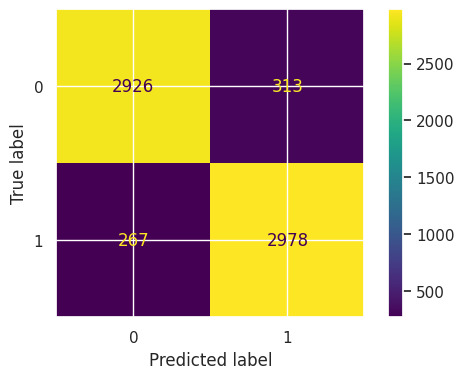

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test_binary, model_predicted_binary)

The High Price houses are better classified than Low Price houses under Neural Network.

####Gradient Boosting

Gradient Boosting is an ensemble learning technique that builds a strong predictive model by combining the predictions of multiple weaker models, typically decision trees, in an iterative manner, with a focus on correcting the errors made by the previous models.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a Gradient Boosting classifier
gb_clf = GradientBoostingClassifier(random_state=2023)

# Fit the classifier on the training data
gb_clf.fit(price_X_train, price_y_train)

# Predict on the test data
gb_predicted = gb_clf.predict(price_X_test)

# Calculate and print the evaluation metrics for Gradient Boosting
print("Gradient Boosting Kappa:", round(metrics.cohen_kappa_score(price_y_test, gb_predicted), 3))
print("Gradient Boosting Accuracy:", round(metrics.accuracy_score(price_y_test, gb_predicted), 3))
print("Gradient Boosting Precision:", round(metrics.precision_score(price_y_test, gb_predicted, average='weighted'), 3))
print("Gradient Boosting Recall:", round(metrics.recall_score(price_y_test, gb_predicted, average='weighted'), 3))
print("Gradient Boosting F1 Score:", round(metrics.f1_score(price_y_test, gb_predicted, average='weighted'), 3))


Gradient Boosting Kappa: 0.818
Gradient Boosting Accuracy: 0.909
Gradient Boosting Precision: 0.909
Gradient Boosting Recall: 0.909
Gradient Boosting F1 Score: 0.909



Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.91      3239
           1       0.91      0.91      0.91      3245

    accuracy                           0.91      6484
   macro avg       0.91      0.91      0.91      6484
weighted avg       0.91      0.91      0.91      6484


Confusion Matrix:
[[2930  309]
 [ 281 2964]]


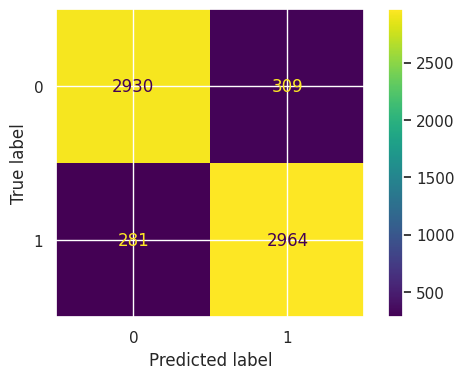

In [ ]:
# Generate and print the classification report
print("\nClassification Report:")
print(classification_report(price_y_test, gb_predicted))

# Generate and print the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(price_y_test, gb_predicted))

ConfusionMatrixDisplay.from_predictions(price_y_test, gb_predicted)

High Price houses have more correct classification than Low price Houses but Neural network has better classification for High price houses than gradient boosting whereas gradient boosting has higher correct classification for low price housing.

<a id = "cell_report"></a>
## 4. Experiments Report

*Provide a summary of experimental results, explain the meaning of your result
and how your model can be used to address the related business problem.*

###House Price Prediction

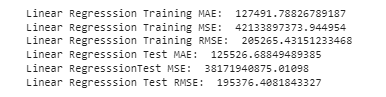

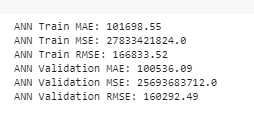

Based on these results, it is clear that the Artificial Neural Network (ANN) outperforms Linear Regression in predicting house prices for this specific dataset. It achieves lower MAE, MSE, and RMSE on both training and validation sets. The correlation values for the true and predicted values is also better for neural network with 0.89 compared to 0.831 for linear regression. There are many reasons for neural network performing better. Firstly, MLP  consist of multiple layers of interconnected nodes (neurons) with nonlinear activation functions. This allows them to capture and represent nonlinear patterns and relationships in data, which linear regression cannot handle effectively. This means, MLP is built on top of linear regression. Also, the model architure is complex than a simple linear regression and finally the overfitting is prevented through the use of regularization techniques.

The ANN model can be used by the real estate company to make more accurate predictions of house prices, which is crucial for property valuation, investment decisions, and market analysis.
Additionally, the ANN model can help the company identify factors and features that contribute significantly to house prices, providing valuable insights for pricing strategies and investment opportunities.

####House Price Classification

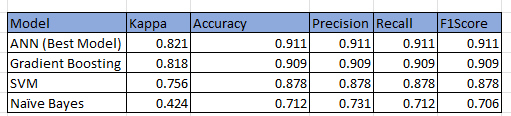

From the experiment summary, we can see the Artificial Neural Network (ANN) appears to be the best-performing model in terms of all metrics.
With high Kappa and accuracy, it demonstrates strong overall predictive performance and agreement with actual labels. Gradient Boosting performs closely to the ANN and is an excellent alternative with high agreement, accuracy, and balanced precision and recall. SVM has a reasonably good performance but not as well to GB and ANN. Naive Bayes ont the other hand has a lowest performance. The highly accurate model will help real estate companies to segment the real estate market and different marketing strategies can be formed to buyers of each category.